In [47]:
from loading import *

In [48]:
ds = 1
HID = 4049605

In [49]:
# create a custom color map
# from: https://carbondesignsystem.com/data-visualization/color-palettes/
colors = [ '#e8daff', '#d4bbff', '#be95ff', '#a56eff', 
          '#8a3ffc', '#6929c4', '#491d8b', '#31135e', '#1c0f30',
          '#31135e', '#491d8b', '#6929c4', '#8a3ffc', '#a56eff',
          '#be95ff', '#d4bbff', '#e8daff',]

import matplotlib as mpl

cmap = mpl.colors.LinearSegmentedColormap.from_list('purple_converging', colors, 256)

In [50]:
with h5.File(join(SRC, 'halo_catalogue.h5'), 'r') as halo_cat:
    hid_mask = (halo_cat['OHID'][:] == HID)
    X = halo_cat['x'][hid_mask]
    Y = halo_cat['y'][hid_mask]
    Z = halo_cat['z'][hid_mask]
    R200 = halo_cat['R200m'][hid_mask]

In [51]:
with h5.File('out/rh_bestfits.h5') as rhdf:
    rh_mask = np.where(rhdf['HID'][:] == HID)[0]

    morb = rhdf['Morb'][rh_mask]
    rh_bestfit = (rhdf['rh'][rh_mask]/1000) * (morb / PIVOT_MASS)**(0.221)
    rh_edgar = (843.8/1000) * (morb / PIVOT_MASS)**(0.221)

In [52]:
xyz = np.load(f'out/particle_data/hid_{HID}_{ds}_xyz.npy')
x = xyz[:, 0]; y = xyz[:, 1]; z = xyz[:, 2]

tag = np.load(f'out/particle_data/hid_{HID}_{ds}_tag.npy')
# orbiting = tag == 1

vxyz = np.load(f'out/particle_data/hid_{HID}_{ds}_vel.npy')
vx, vy, vz = vxyz[:, 0], vxyz[:, 1], vxyz[:, 2]

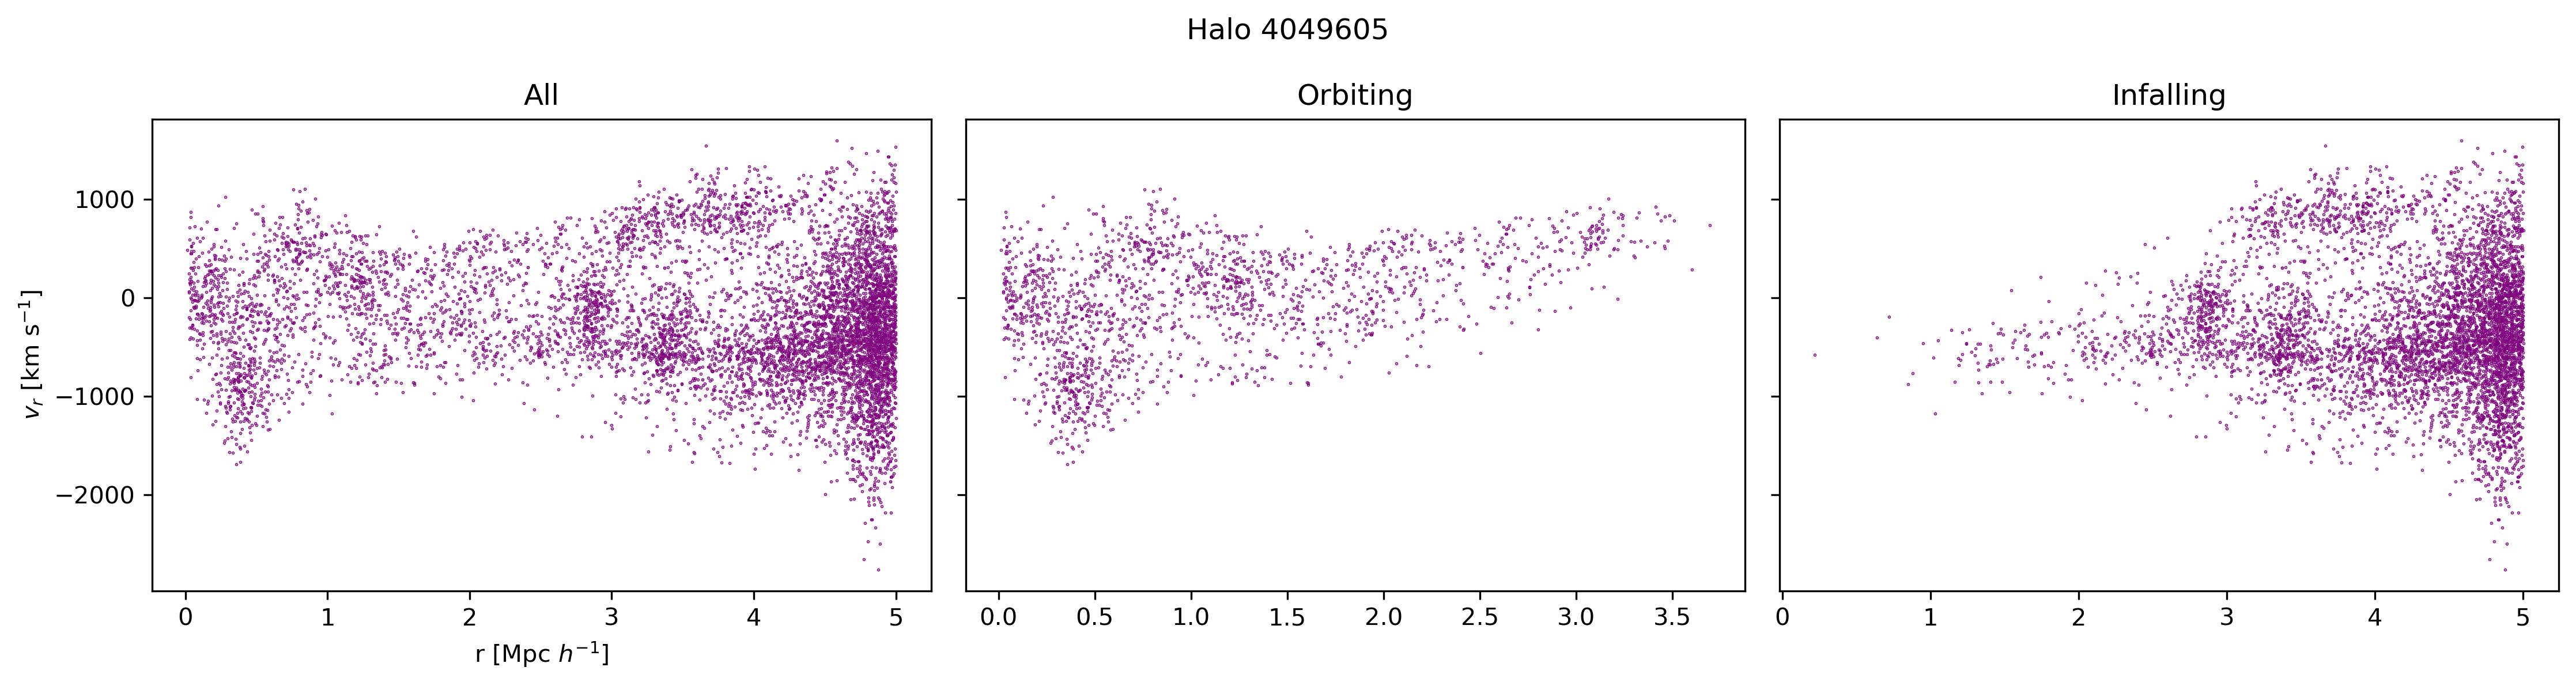

In [53]:
# make vr vs r projection space
r = np.sqrt(x**2 + y**2 + z**2)
theta = np.arccos(z/r)
phi = np.arctan2(y, x)
r_hat = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
vr = np.sum(vxyz * r_hat.T, axis=1)

fig, ax = plt.subplots(1, 3, figsize=(15, 4), dpi=300, sharey=True)
ax[0].scatter(r, vr, s=0.1, alpha=1, c='purple')
ax[1].scatter(r[tag], vr[tag], s=0.1, alpha=1, c='purple')
ax[2].scatter(r[~tag], vr[~tag], s=0.1, alpha=1, c='purple')

ax[0].set_xlabel('r [Mpc $h^{-1}$]')
ax[0].set_ylabel('$v_r$ [km s$^{-1}$]')

ax[0].set_title('All')
ax[1].set_title('Orbiting')
ax[2].set_title('Infalling')

plt.suptitle(f'Halo {HID}')

plt.tight_layout()

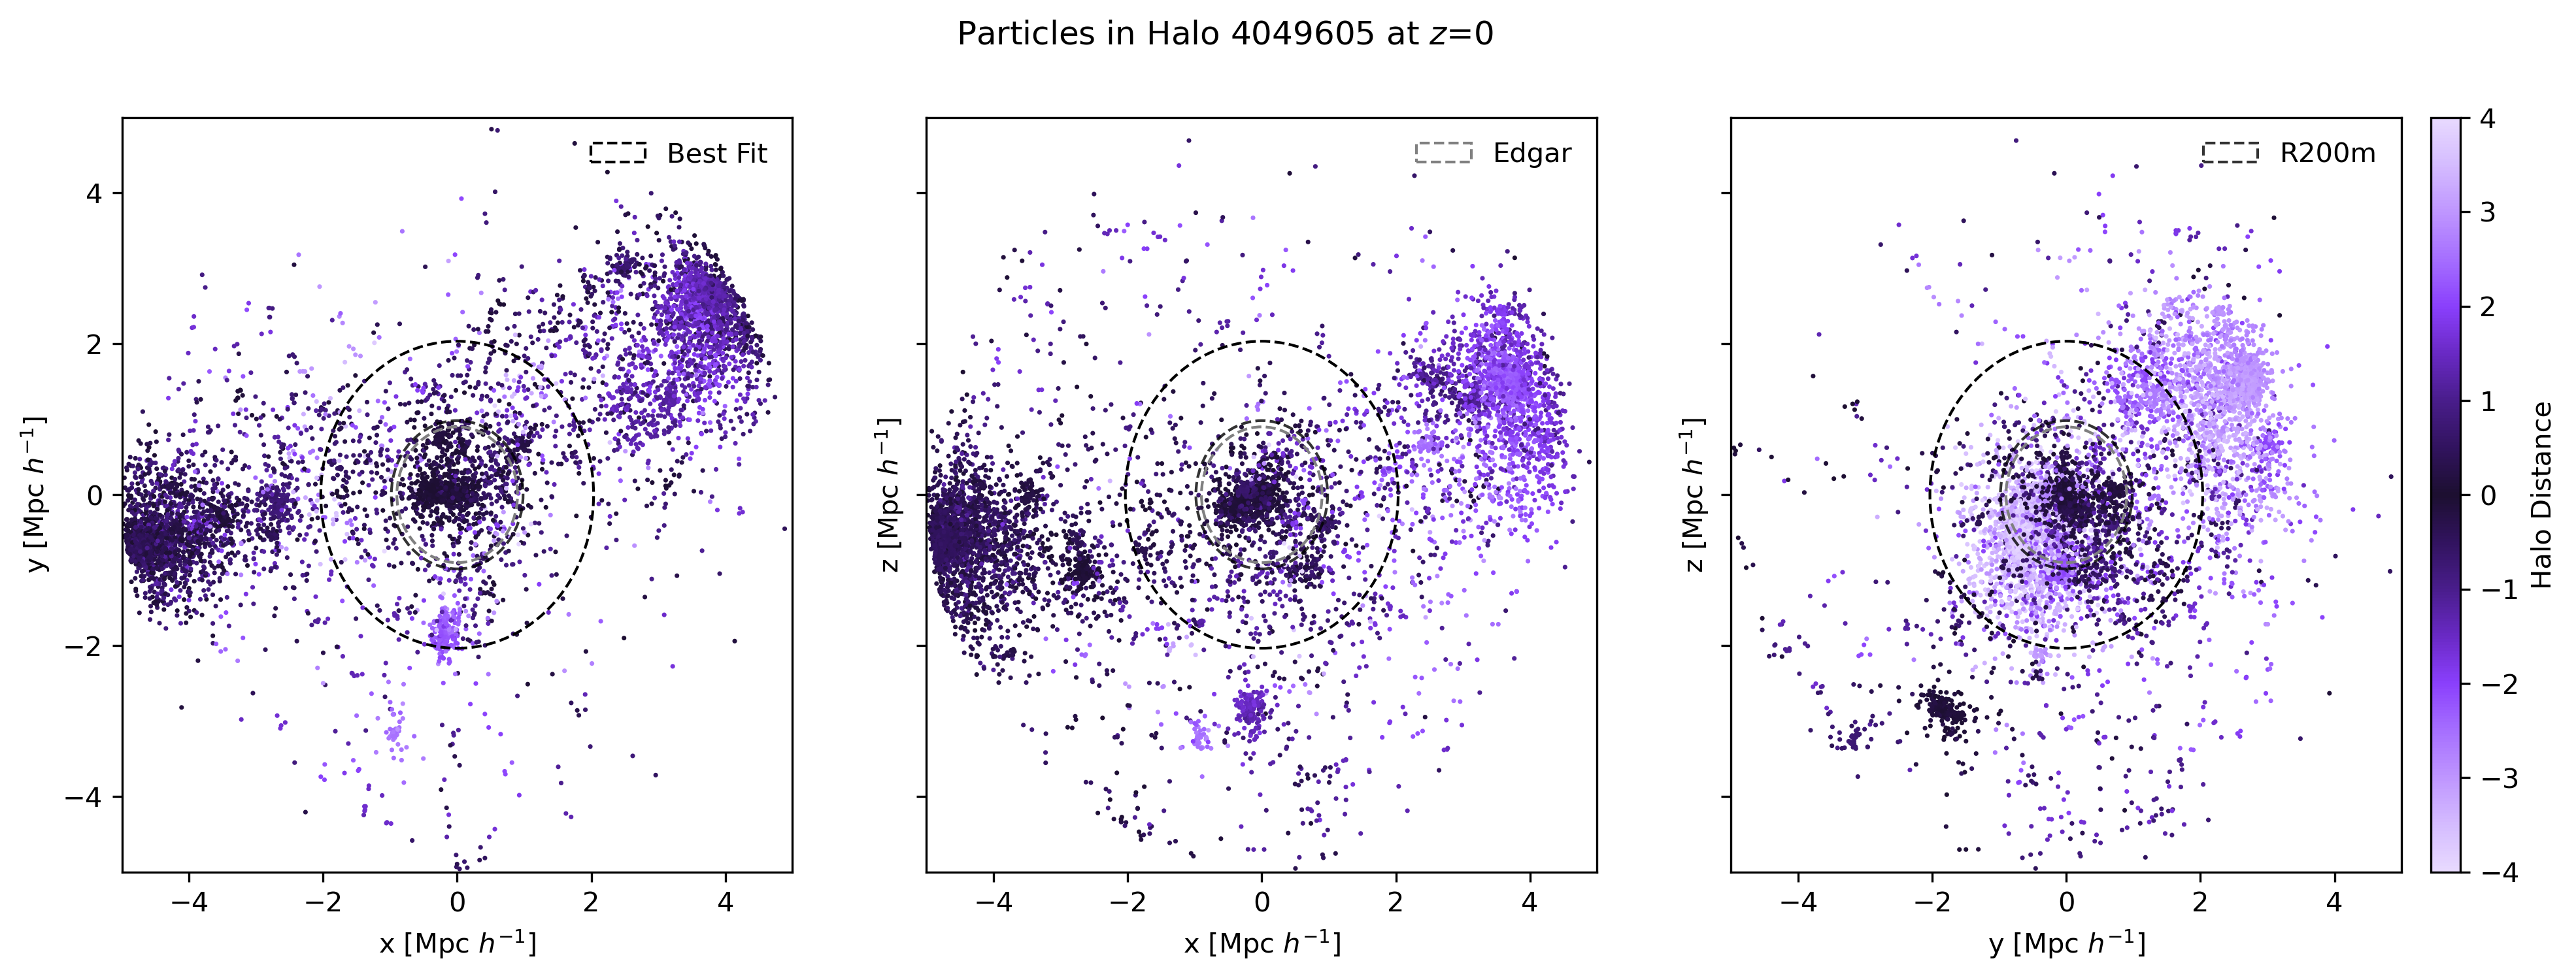

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, dpi=300)
ax[0].scatter(x, y, c=z, s=0.5, cmap=cmap)
ax[1].scatter(x, z, c=y, s=0.5, cmap=cmap)
ax[2].scatter(y, z, c=x, s=0.5, cmap=cmap)

# draw a circle with dashed line with radius of R200
ax[0].add_patch(plt.Circle((0, 0), rh_bestfit, color='k', fill=False, linestyle='--', label='Best Fit'))
ax[1].add_patch(plt.Circle((0, 0), rh_bestfit, color='k', fill=False, linestyle='--'))
ax[2].add_patch(plt.Circle((0, 0), rh_bestfit, color='k', fill=False, linestyle='--'))
ax[0].add_patch(plt.Circle((0, 0), rh_edgar, color='gray', fill=False, linestyle='--'))
ax[1].add_patch(plt.Circle((0, 0), rh_edgar, color='gray', fill=False, linestyle='--', label='Edgar'))
ax[2].add_patch(plt.Circle((0, 0), rh_edgar, color='gray', fill=False, linestyle='--'))
ax[0].add_patch(plt.Circle((0, 0), R200, color='k', alpha=0.8, fill=False, linestyle='--'))
ax[1].add_patch(plt.Circle((0, 0), R200, color='k', alpha=0.8, fill=False, linestyle='--'))
ax[2].add_patch(plt.Circle((0, 0), R200, color='k', alpha=0.8, fill=False, linestyle='--', label='R200m'))

ax[0].legend(loc='upper right', frameon=False)
ax[1].legend(loc='upper right', frameon=False)
ax[2].legend(loc='upper right', frameon=False)


ax[0].set_xlabel('x [Mpc $h^{-1}$]')
ax[0].set_ylabel('y [Mpc $h^{-1}$]')
ax[1].set_xlabel('x [Mpc $h^{-1}$]')
ax[1].set_ylabel('z [Mpc $h^{-1}$]')
ax[2].set_xlabel('y [Mpc $h^{-1}$]')
ax[2].set_ylabel('z [Mpc $h^{-1}$]')

ax[0].set_xlim((-5, 5))
ax[0].set_ylim((-5, 5))

# add colorbar to axes 0
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-4, vmax=4))
sm._A = []

cax = fig.add_axes([ax[-1].get_position().x1+0.01, ax[-1].get_position().y0, 0.01, ax[-1].get_position().height])

cbar = fig.colorbar(sm, cax=cax)

cbar.set_label('Halo Distance')

plt.suptitle(f'Particles in Halo {HID} at $z$=0')
plt.show()

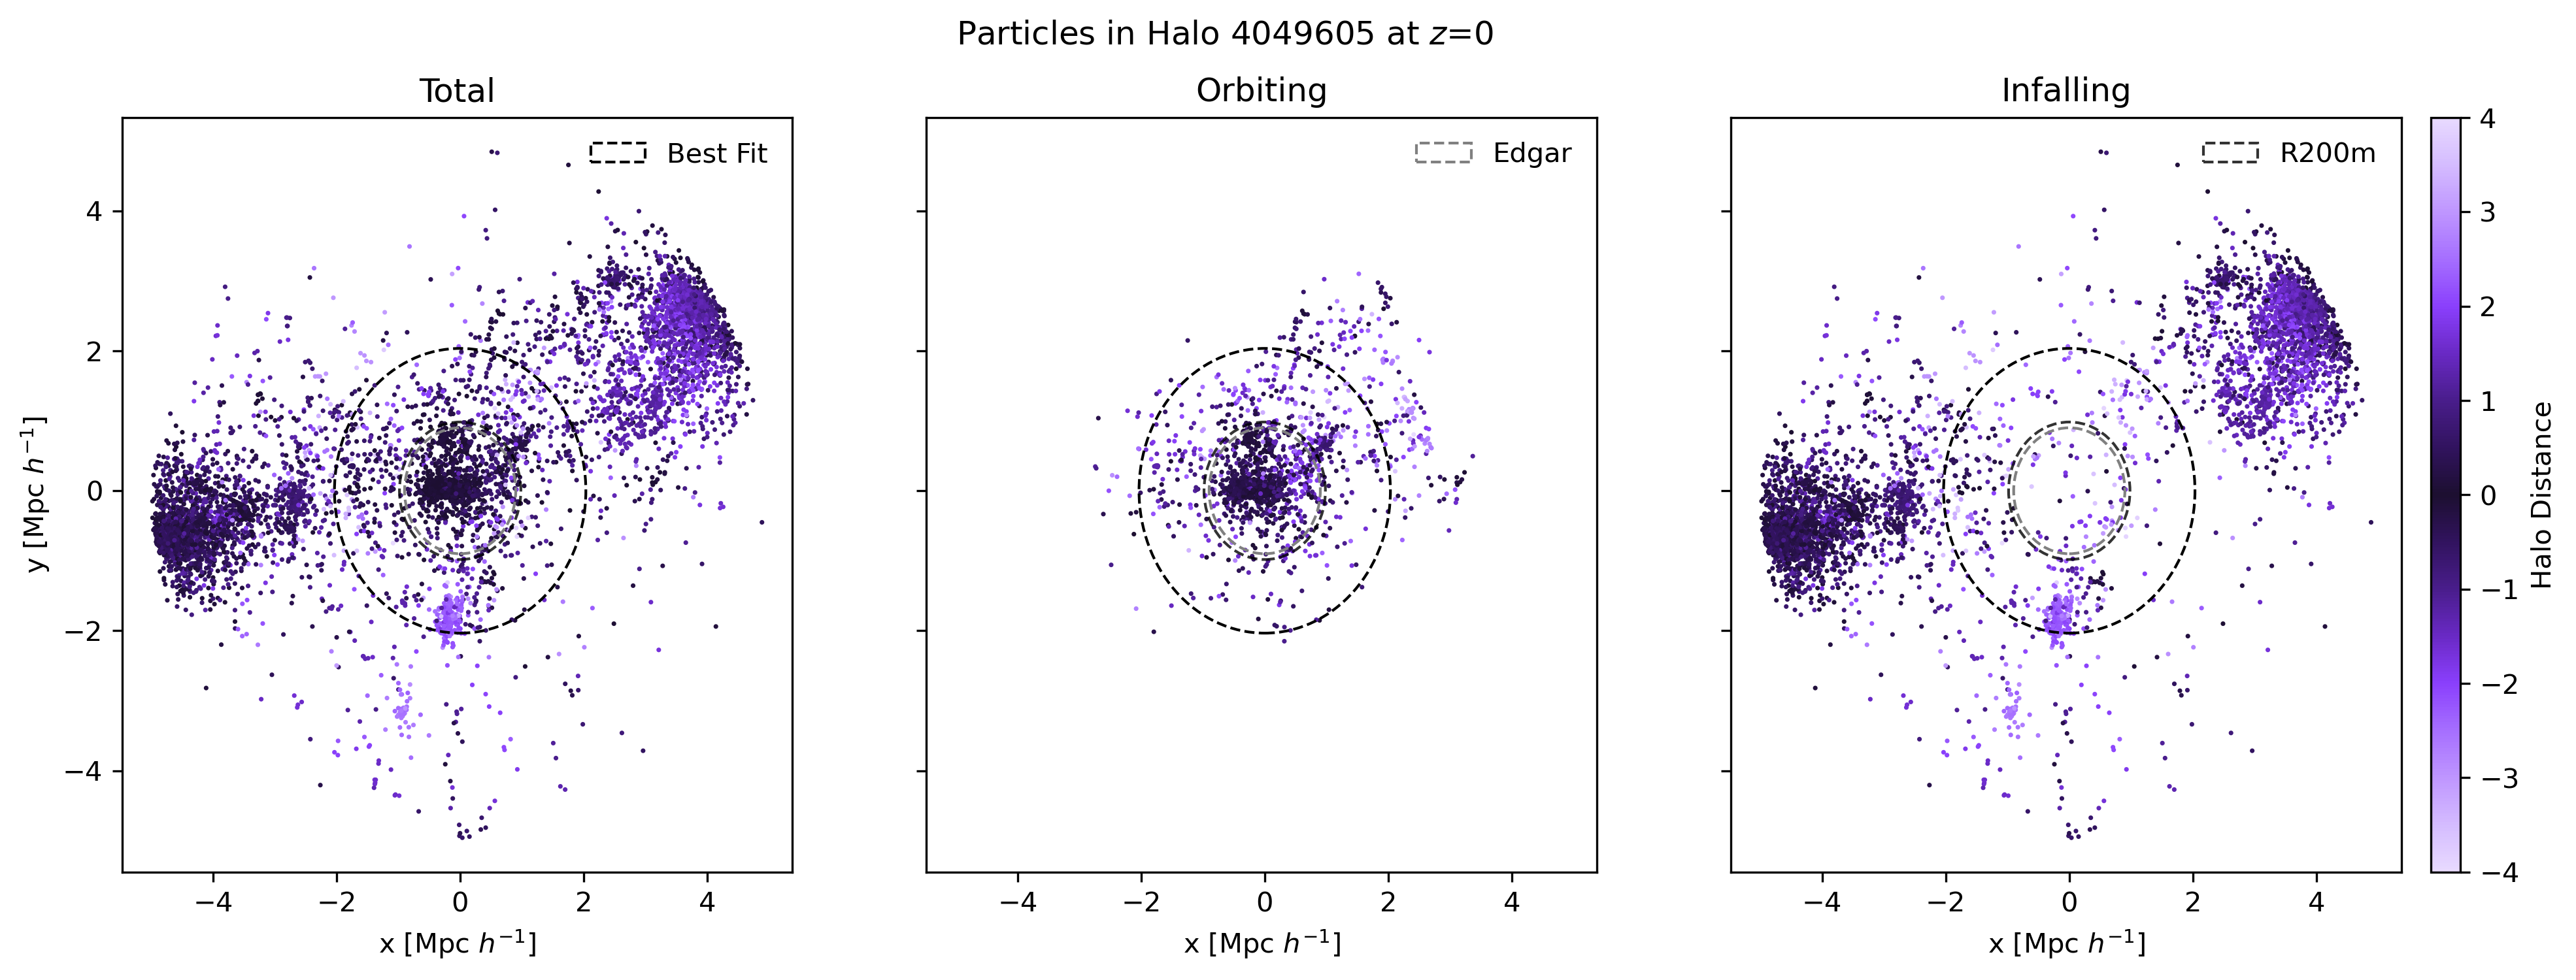

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, dpi=300)

ax[0].scatter(x, y, c=z, s=0.5, cmap=cmap)
ax[1].scatter(x[tag], y[tag], c=z[tag], s=0.5, cmap=cmap)
ax[2].scatter(x[~tag], y[~tag], c=z[~tag], s=0.5, cmap=cmap)

# draw a circle with dashed line with radius of R200
ax[0].add_patch(plt.Circle((0, 0), rh_bestfit, color='k', fill=False, linestyle='--', label='Best Fit'))
ax[1].add_patch(plt.Circle((0, 0), rh_bestfit, color='k', fill=False, linestyle='--'))
ax[2].add_patch(plt.Circle((0, 0), rh_bestfit, color='k', fill=False, linestyle='--'))
ax[0].add_patch(plt.Circle((0, 0), rh_edgar, color='gray', fill=False, linestyle='--'))
ax[1].add_patch(plt.Circle((0, 0), rh_edgar, color='gray', fill=False, linestyle='--', label='Edgar'))
ax[2].add_patch(plt.Circle((0, 0), rh_edgar, color='gray', fill=False, linestyle='--'))
ax[0].add_patch(plt.Circle((0, 0), R200, color='k', alpha=0.8, fill=False, linestyle='--'))
ax[1].add_patch(plt.Circle((0, 0), R200, color='k', alpha=0.8, fill=False, linestyle='--'))
ax[2].add_patch(plt.Circle((0, 0), R200, color='k', alpha=0.8, fill=False, linestyle='--', label='R200m'))

ax[0].legend(loc='upper right', frameon=False)
ax[1].legend(loc='upper right', frameon=False)
ax[2].legend(loc='upper right', frameon=False)

ax[0].set_xlabel('x [Mpc $h^{-1}$]')
ax[0].set_ylabel('y [Mpc $h^{-1}$]')
ax[1].set_xlabel('x [Mpc $h^{-1}$]')
ax[2].set_xlabel('x [Mpc $h^{-1}$]')


ax[0].set_title('Total')
ax[1].set_title('Orbiting')
ax[2].set_title('Infalling')

cax = fig.add_axes([ax[-1].get_position().x1+0.01, ax[-1].get_position().y0, 0.01, ax[-1].get_position().height])

cbar = fig.colorbar(sm, cax=cax)

cbar.set_label('Halo Distance')

plt.suptitle(f'Particles in Halo {HID} at $z$=0')
plt.show()


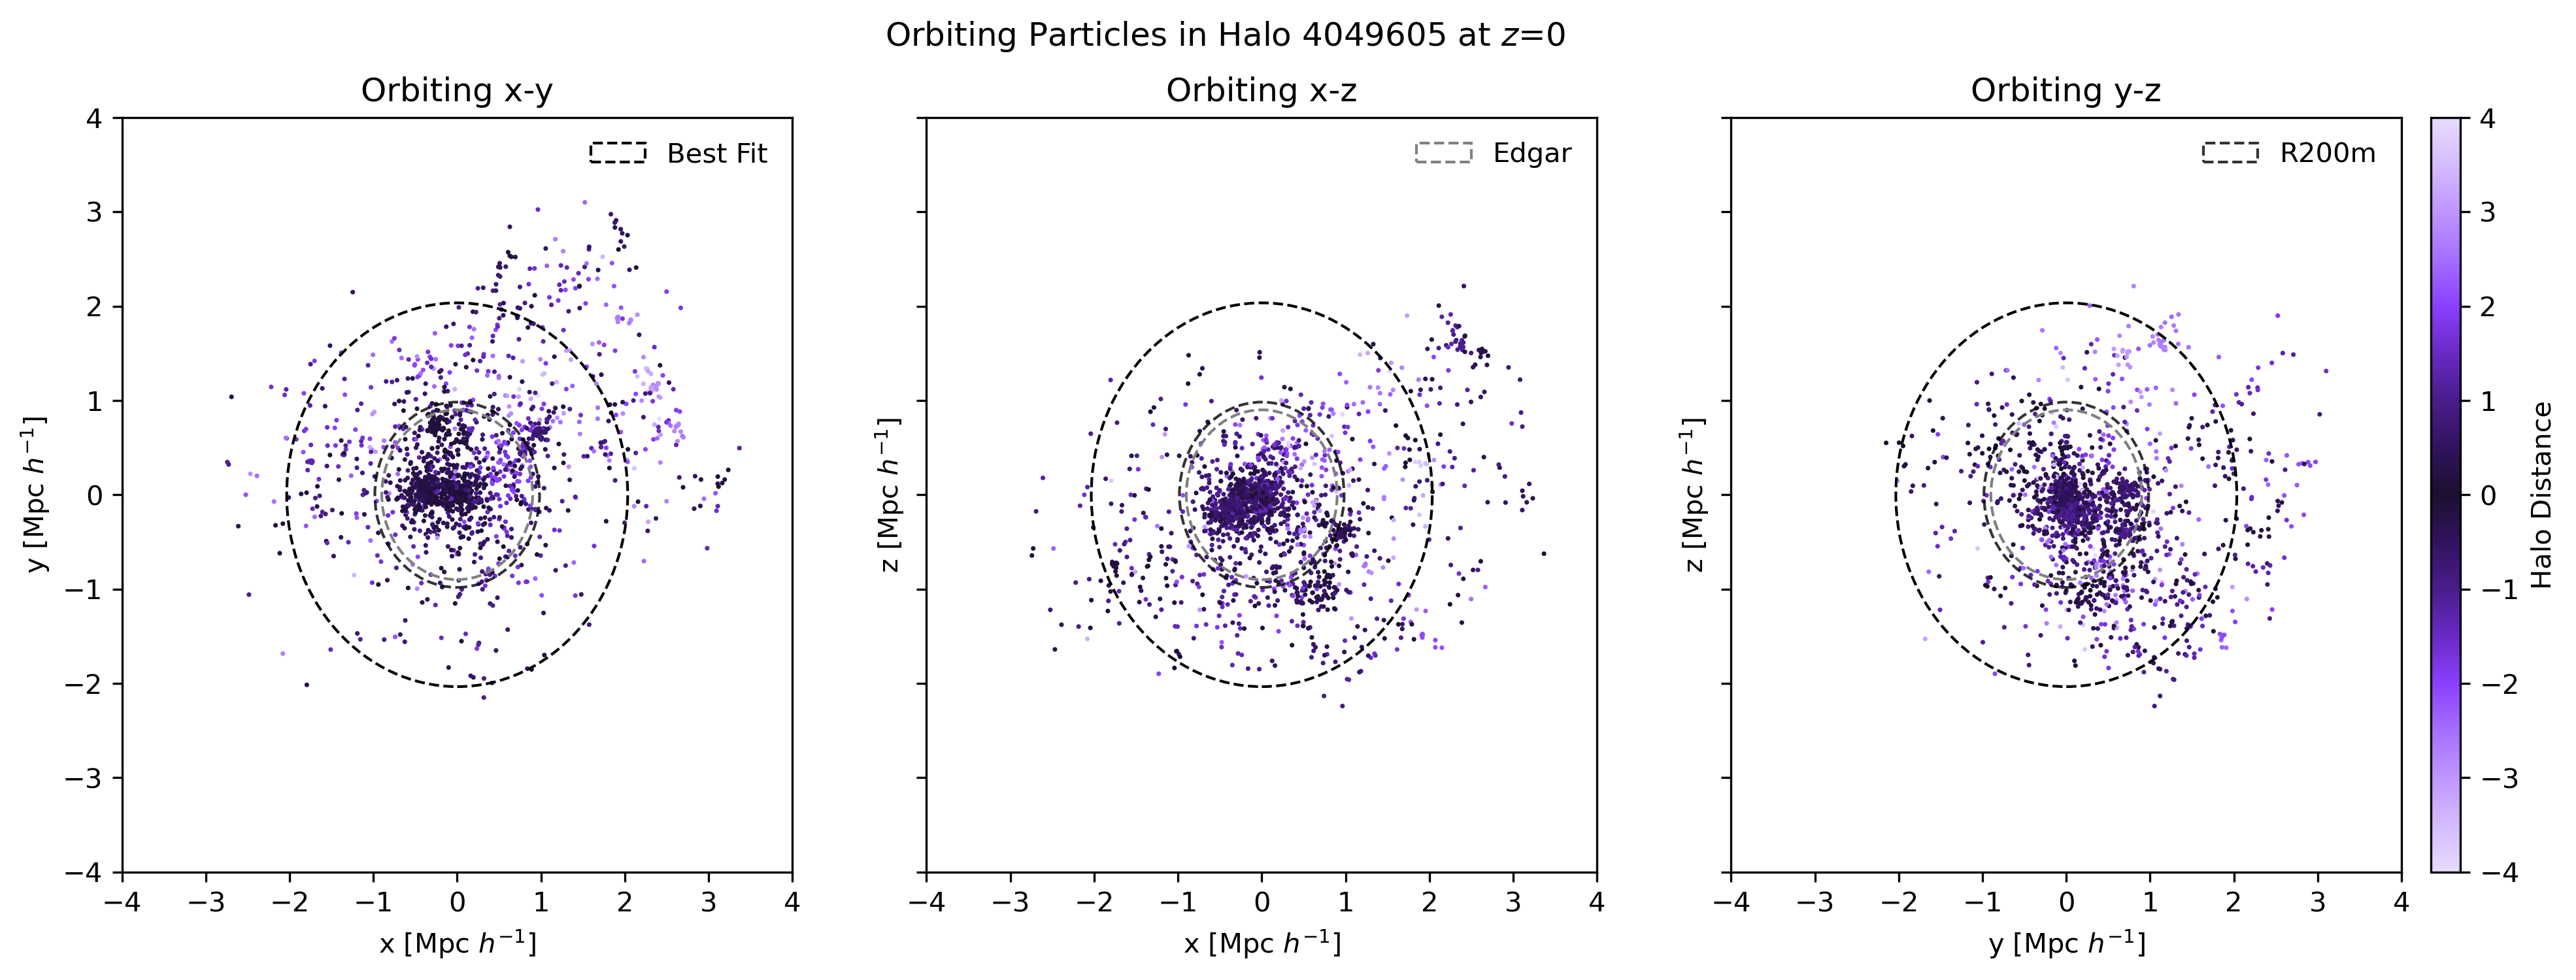

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, dpi=300)

ax[0].scatter(x[tag], y[tag], c=z[tag], s=0.5, cmap=cmap)
ax[1].scatter(x[tag], z[tag], c=y[tag], s=0.5, cmap=cmap)
ax[2].scatter(y[tag], z[tag], c=x[tag], s=0.5, cmap=cmap)

ax[0].set_xlim((-4, 4))
ax[0].set_ylim((-4, 4))

# draw a circle with dashed line with radius of R200
ax[0].add_patch(plt.Circle((0, 0), rh_bestfit, color='k', fill=False, linestyle='--', label='Best Fit'))
ax[1].add_patch(plt.Circle((0, 0), rh_bestfit, color='k', fill=False, linestyle='--'))
ax[2].add_patch(plt.Circle((0, 0), rh_bestfit, color='k', fill=False, linestyle='--'))
ax[0].add_patch(plt.Circle((0, 0), rh_edgar, color='gray', fill=False, linestyle='--'))
ax[1].add_patch(plt.Circle((0, 0), rh_edgar, color='gray', fill=False, linestyle='--', label='Edgar'))
ax[2].add_patch(plt.Circle((0, 0), rh_edgar, color='gray', fill=False, linestyle='--'))
ax[0].add_patch(plt.Circle((0, 0), R200, color='k', alpha=0.8, fill=False, linestyle='--'))
ax[1].add_patch(plt.Circle((0, 0), R200, color='k', alpha=0.8, fill=False, linestyle='--'))
ax[2].add_patch(plt.Circle((0, 0), R200, color='k', alpha=0.8, fill=False, linestyle='--', label='R200m'))

ax[0].legend(loc='upper right', frameon=False)
ax[1].legend(loc='upper right', frameon=False)
ax[2].legend(loc='upper right', frameon=False)

ax[0].set_xlabel('x [Mpc $h^{-1}$]')
ax[0].set_ylabel('y [Mpc $h^{-1}$]')
ax[1].set_xlabel('x [Mpc $h^{-1}$]')
ax[1].set_ylabel('z [Mpc $h^{-1}$]')
ax[2].set_xlabel('y [Mpc $h^{-1}$]')
ax[2].set_ylabel('z [Mpc $h^{-1}$]')


ax[0].set_title('Orbiting x-y')
ax[1].set_title('Orbiting x-z')
ax[2].set_title('Orbiting y-z')

cax = fig.add_axes([ax[-1].get_position().x1+0.01, ax[-1].get_position().y0, 0.01, ax[-1].get_position().height])

cbar = fig.colorbar(sm, cax=cax)

cbar.set_label('Halo Distance')

plt.suptitle(f'Orbiting Particles in Halo {HID} at $z$=0')
# plt.tight_layout()
plt.show()
